<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_02/CAP413_HandsOn_02_Barauna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-417-3: Estatística Computacional
## Hands On 02

* Luan Orion Baraúna 

These exercices has proveide for [this](https://youtu.be/F-Z6p87Fifs) class. 



## 0. Provacation
Perfect Linear Relation 

For the generations of a "perfect" linear relation we will genrenate a randow values beteween a 0 and 100 using the `numpy` python library. 

$$
y = f (x) = a \cdot x + b
$$

*  $a < 0, a = 0, a > 0$

*  $b < 0, b = 0, b > 0$


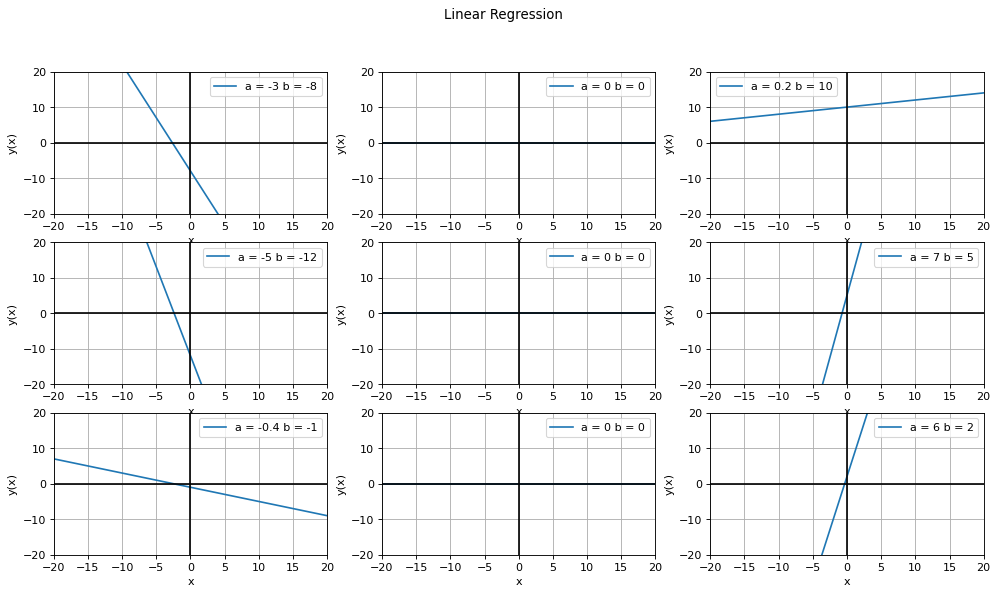

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


#Defing the Function
def y(x,a,b): return(a*x+b)
#Creating a x range
x = np.linspace(-100,100)

#Creating the figure envirement
figure(figsize=(15, 8), dpi=80)
#Figure Paramentes
x_min, x_max = -20,20
y_min, y_max = -20,20

a_ = [-3,0,0.2,
     -5,0,7,
     -0.4,0,6]

b_ = [-8,0,10,
     -12,0,5,
     -1,0,2]

plt.suptitle('Linear Regression')

for i in range(1,len(a_)+1):
    plt.subplot(3,3,i)
    a,b  = a_[i-1], b_[i-1]
    plt.plot(x,y(x,a,b) , label='a = '+str(a)+' b = '+str(b) )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True, which='both')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()


## 1. Diretct and Inverse Problem 

_From $x$, $y(x)$, what is the value of a and b?_


### High School Way 

For these task we will use the classic way to find the angular coefieinct of line.

<img src=http://www.estgv.ipv.pt/PaginasPessoais/fmartins/Aluno/Matem%C3%A1tica/Ensino%20m%C3%A9dio/Geometria%20analitica%20%20Retas/Image6.gif>


$$
y(x) = ax+b
$$

$$
y(x_1) - y(x_0) = ax_1 + b - ax_2 - b
$$

$$
y(x_1) - y(x_0) = a(x_1 + - x_2)
$$

$$
a = \frac{y(x_1) - y(x_0)}{x_1 - x_0}
$$

For these, we will generate a random value for $a$ and $b$ create a linear distribuitions and calculate 

`a = (y[x[i]] - y[x[i-1]])/(x[i]-x[i-1])`

For the calculation of $b$ we will calculate 

$$
y(0) = b
$$


In [ ]:
import random as rnd

x = np.linspace(0,100)
a, b = np.random.rand() ,np.random.rand()
def y(x):return a*x+b

#Distance beteweem two points
delta = 1
a_cal = (y(x[i])-y(x[i-delta]))/(x[i]-x[i-delta])

print('Valor inicial de a  ', a)
print('Valor calculado de a',a_cal)
print('Diferença para a é  ',abs(a-a_cal))

b_cal = y(0)

print('\nValor inicial de b', b)
print('Valor calculado de b',b_cal)
print('Diferença para b é',abs(b-b_cal))


Valor inicial de a   0.9526840669046106
Valor calculado de a 0.9526840669046077
Diferença para a é   2.886579864025407e-15

Valor inicial de b 0.10471278944683238
Valor calculado de b 0.10471278944683238
Diferença para b é 0.0


[]

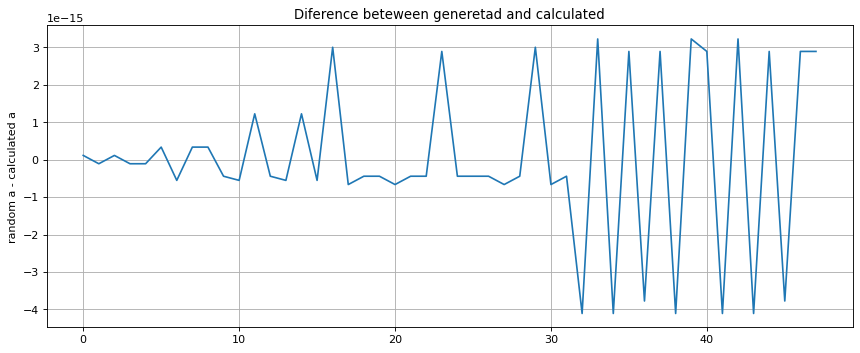

In [ ]:
#Ploting the diference value
a_dif = []
for i in range(1,len(x)-1,delta): a_dif.append(a-(y(x[i])-y(x[i-delta]))/(x[i]-x[i-delta]))

figure(figsize=(13, 5), dpi=80)
plt.plot(a_dif)
plt.title('Diference beteween generetad and calculated')
plt.ylabel('random a - calculated a')
plt.grid(True, which='both')
plt.plot()

## 2. Regression

We will build an algorithm that generates a new value of parameters a and b randomly and see how close these values are to the original value.

For this we will build a _lambda_ function that allows a fraction of this random step. In this way, preventing the step from going, increasingly in random directions.

We will explore some errors functions just like:

$$
{\displaystyle \operatorname {MEA} ={\frac {1}{n}}\sum _{i=1}^{n}(y(x_{i})-{{y'(x_{i})}})}
$$

$$
{\displaystyle \operatorname {ABS} ={\frac {1}{n}}\sum _{i=1}^{n}(|y(x_{i})-{{y'(x_{i})|}})}
$$


$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y(x_{i})-{{y'(x_{i})}})^{2}}
$$


In [ ]:
x = np.linspace(0,100)
a, b = np.random.rand() ,np.random.rand()
#a, b = np.pi, np.e
def y(x):return a*x+b

In [ ]:
#size of the spet
lambda_a = 1
lambda_b = 1
# Minimum  diference
minimum_diference = 1e-4

#Inicial Paramentes    
dife_a, dife_b = 10,10,
times,times_a,times_b,times_err = 0,0,0,0
a_init, b_init, error_init = 10,10, 1e10

y_original = a*x+b

#Inicial empity vectors
vec_a, vec_b, vec_error, time_a, time_b, time_err, time_all = [],[],[],[],[],[],[]

all_a, all_b, all_err_normal, all_err_absot, all_err_mensqu = [],[],[],[],[]

vec_error_abslot = []
vec_error_normal = []
while (dife_a > minimum_diference and dife_b > minimum_diference and error > minimum_diference):
    
    time_all.append(times)
    times = times+1
    #new parameters
    new_a, new_b  = np.random.rand(), np.random.rand()
    #Diferences
    dife_a, dife_b = abs(a - new_a), abs(b - new_b)
    
    y_line = new_a*x+new_b
    
    error_normal = sum((y_original-y_line))/len(y_line)
    error_abslot = sum(abs((y_original-y_line)))/len(y_line)
    error_mensqu = sum((y_original-y_line)**2)/len(y_line)
    error = error_mensqu
    
    all_a.append(new_a)        
    all_b.append(new_b)        
    all_err_normal.append(error_normal)
    all_err_absot.append(error_abslot)
    all_err_mensqu.append(error_mensqu)
    
    if  dife_a < a_init:
        vec_a.append(new_a)
        time_a.append(times_a)
        times_a = times_a + 1
        a_init = dife_a
    else: pass
    
    if  dife_b < b_init:
        vec_b.append(new_b)
        time_b.append(times_b)
        times_b = times_b + 1
        b_init = dife_b
    else: pass
    
    if error < error_init:
        vec_error.append(error)
        vec_error_abslot.append(error_abslot)
        vec_error_normal.append(error_normal)
        time_err.append(times_err)
        times_err = times_err + 1
        error_init = error
    else: pass

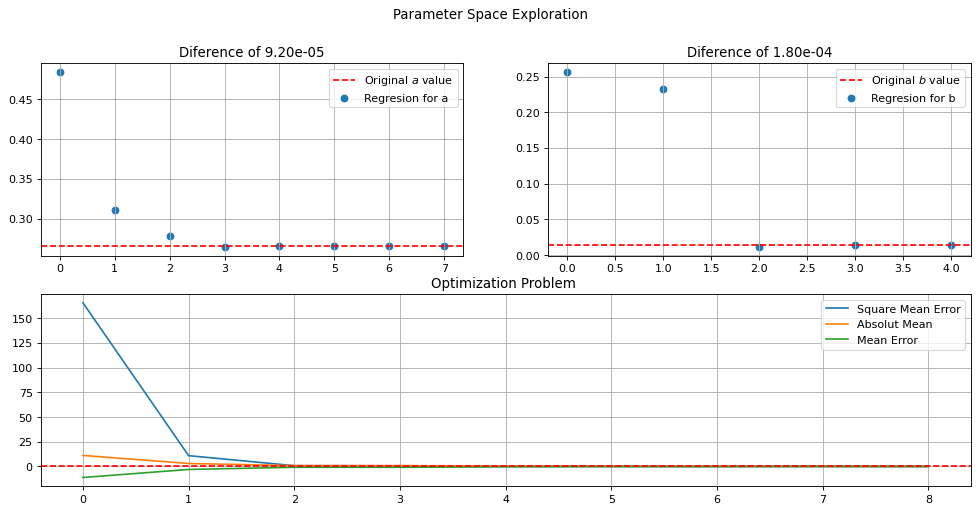

In [ ]:
figure(figsize=(15, 7), dpi=80)

plt.suptitle('Parameter Space Exploration')

plt.subplot(2,2,1)
plt.scatter(time_a,vec_a,label='Regresion for a')
plt.axhline(y=a, color='red',linestyle='--',label='Original $a$ value')
plt.title('Diference of '+str(format(abs(vec_a[-1]-a),'1.2e')))
plt.grid()
plt.legend()

plt.subplot(2,2,2)
plt.scatter(time_b,vec_b,label='Regresion for b')
plt.axhline(y=b, color='red',linestyle='--',label='Original $b$ value')
plt.title('Diference of '+str(format(abs(vec_b[-1]-b),'1.2e')))
plt.grid()#True, which='both')
plt.legend()

plt.subplot(2,2,(3,4))
plt.plot(vec_error, label = 'Square Mean Error')
plt.plot(vec_error_abslot, label = 'Absolut Mean')
plt.plot(vec_error_normal, label = 'Mean Error')
#plt.scatter(time_err,vec_error,label='Regresion for error')
plt.axhline(y=0, color='red',linestyle='--')
plt.title('Optimization Problem ')#+str(format(vec_error[-1],'1.2e')))
plt.legend()
plt.grid()#True, which='both')
#plt.legend()
plt.show()

### 2.1  

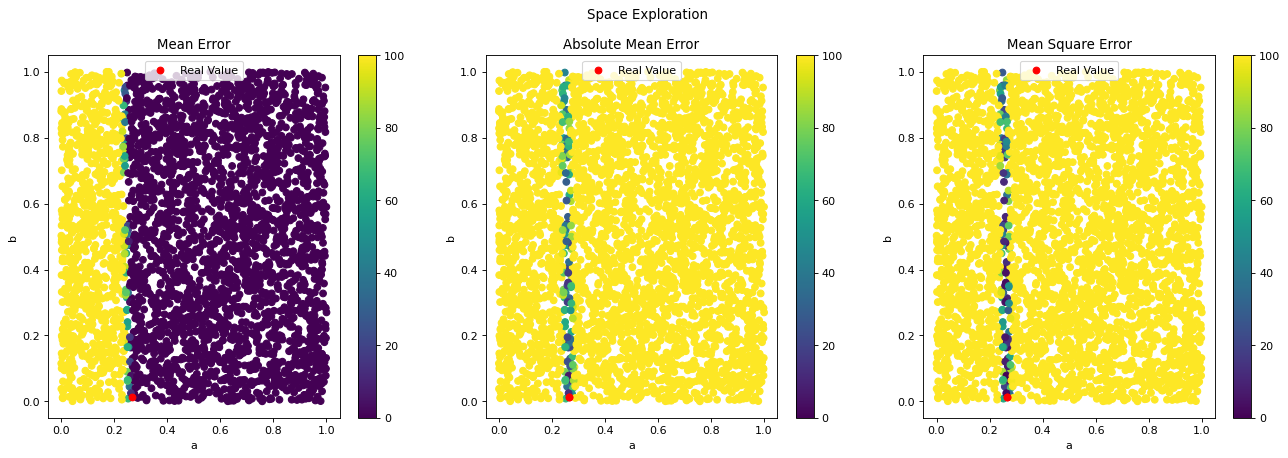

In [ ]:
import matplotlib.pyplot as plt
from numpy import loadtxt

figure(figsize=(20, 6), dpi=80)

plt.suptitle('Space Exploration')

plt.subplot(1,3,1)
colors = plt.cm.viridis(all_err_normal)
sc=plt.scatter(all_a, all_b, c=colors)
plt.clim(0, 100)
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Mean Error")

plt.subplot(1,3,2)
colors = plt.cm.viridis(all_err_absot)
sc=plt.scatter(all_a, all_b, c=colors)
plt.clim(0, 100)
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value')
plt.legend()
plt.title("Absolute Mean Error")


plt.subplot(1,3,3)
colors = plt.cm.viridis(all_err_mensqu)
sc=plt.scatter(all_a, all_b, c=colors)
plt.clim(0, 100)
plt.colorbar()
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(a,b,color='red')
plt.scatter(a,b,color='red',label='Real Value',zorder=1)
plt.legend()
plt.title("Mean Square Error")


plt.show()

### 2.3 Analytical Optimization Approache

## Noise Adition

For now let's create a new dataset consisting of some measurement errors. Let's imagine the linear function in the format below that we will call _"Baranuna's Linear Function"_.

$$
y(x) = \pi x + e
$$

Where $\pi$ and $e$ are the fundamental constants of mathmatics.

Let's assume that the measurements performed on $y$ for each value of $x$ were made with questionable accuracy. In this way we have that the values of y do not correspond perfectly to our linear function.

$$
y'(x) = \pi x + e + NOISE
$$

Onde 

$$
NOISE = \kappa \cdot random[-1,1]
$$

For these problem we will use `sklearn` python libray and use the $R^2$ parameter has avalutarion 

$$
{\displaystyle R^{2}= 1- \frac{\sum _{i}(y_{i}-f_{i})^{2}}{\sum _{i}(y_{i}-{\bar {y}})^{2}}}
$$




In [ ]:
import numpy as np
from numpy import random

#Size of the data
Number_of_points = 25

#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
x = np.random.uniform(-10,30,Number_of_points)
#Sorting the x vetor
x = np.sort(x)
#Weigth parameter
kappa = 10
#Genereting the Noise vector
NOISE = [round(kappa*np.random.rand(),4) for i in range(Number_of_points)]
# y of linar distribuiton 
y_bara = np.pi*x + np.e + NOISE


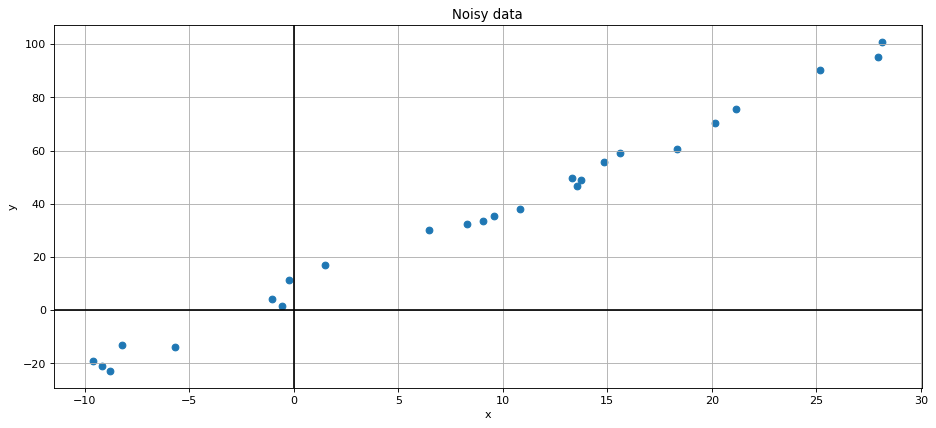

In [ ]:
figure(figsize=(14, 6), dpi=80)
plt.scatter(x,y_bara)
plt.title('Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()#True, which='both')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = x.reshape((-1, 1))
y = y_bara
model = LinearRegression()
model.fit(x, y)
#model = LinearRegression().fit(x, y_bara)
r_sq = model.score(x, y)
fit_a, fit_b =model.coef_ ,  model.intercept_
print('coefficient of determination:', r_sq)
print('intercept or b parameter',fit_b)
print('slope or the anbular coeficiente:', fit_a)

coefficient of determination: 0.9929093654778981
intercept or b parameter 7.677169012257032
slope or the anbular coeficiente: [3.14904709]


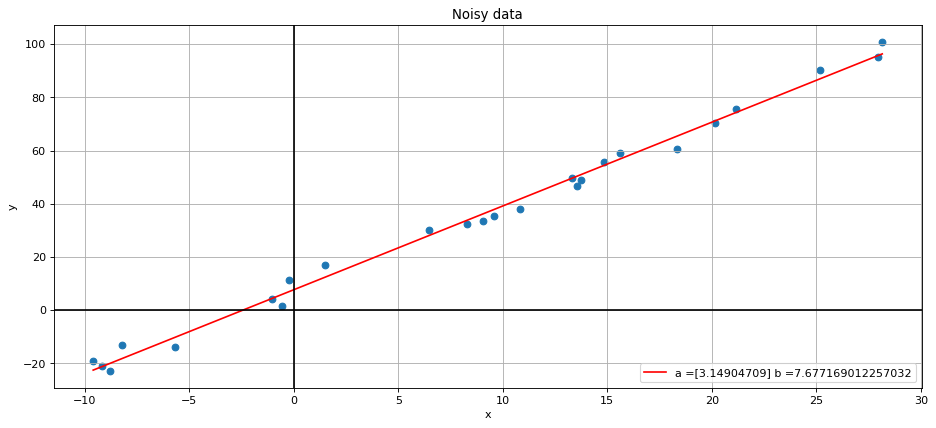

In [ ]:
figure(figsize=(14, 6), dpi=80)
plt.scatter(x,y_bara)
plt.plot(x,(fit_a*x+fit_b),color='red',label='a ='+str(fit_a)+' b ='+str(fit_b))
plt.title('Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()#True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()


coefficient of determination: 0.9801395304132188
intercept: 32.67241014923093
slope: [3.04517671]


In [ ]:
#size of the spet
lambda_a = 1
lambda_b = 1
# Minimum  diference
minimum_diference = 1e-5

#Inicial Paramentes    
dife_a, dife_b = 1,1,
times,times_a,times_b,times_err = 0,0,0,0
a_init, b_init, error_init = 1,1, 1e10

y_original = a*x+b

#Inicial empity vectors
vec_a, vec_b, vec_error, time_a, time_b, time_err = [],[],[],[],[],[]

vec_error_abslot = []
vec_error_normal = []
while (dife_a > minimum_diference and dife_b > minimum_diference and error > minimum_diference):
    
    times = times+1
    #new parameters
    new_a, new_b  = np.random.rand(), np.random.rand()
    #Diferences
    dife_a, dife_b = abs(a - new_a), abs(b - new_b)
    
    y_line = new_a*x+new_b + NOISE
    
    
    error_normal = sum((y_original-y_line))/len(y_line)
    error_abslot = sum(abs((y_original-y_line)))/len(y_line)
    error_mensqu = sum((y_original-y_line)**2)/len(y_line)
    error = error_mensqu
    
    if  dife_a < a_init:
        vec_a.append(new_a)
        time_a.append(times_a)
        times_a = times_a + 1
        a_init = dife_a
    else: pass
    
    if  dife_b < b_init:
        vec_b.append(new_b)
        time_b.append(times_b)
        times_b = times_b + 1
        b_init = dife_b
    else: pass
    
    if error < error_init:
        vec_error.append(error)
        vec_error_abslot.append(error_abslot)
        vec_error_normal.append(error_normal)
        time_err.append(times_err)
        times_err = times_err + 1
        error_init = error
    else: pass

## Linear Regression

Try to indenfi

Text(0, 0.5, '$y(x)$')

<Figure size 640x480 with 0 Axes>

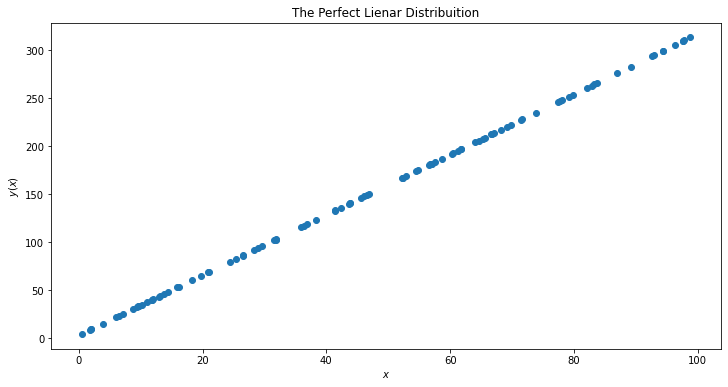

In [ ]:
import numpy as np
import random as rnd

#Creating the Vectors
data_x, data_y =[],[]
#Alocating the random seeds
np.random.seed(0)
#Genereting the x vector 
data_x = [round(100*np.random.rand(),4) for i in range(100)]
#Sorting the x vetor
data_x = np.sort(data_x)
#Defing the paramentes
a_1,b_1 = np.pi, np.e
#Alocating the y(x) vector
data_y = [a_1*data_x[i]+b_1 for i in range(len(data_x))]


from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import seaborn as snq
figure(figsize=(12,6))
plt.scatter(data_x,data_y)
plt.title('The Perfect Lienar Distribuition')
plt.xlabel('$x$')
plt.ylabel(r'$y(x)$')

# REFERENCES 

* https://stackoverflow.com/questions/63995578/change-colour-of-colorbar-in-python-matplotlib
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html